# **Football_Match_Outcome_Prediction**

## **`problem statement`**

---

Football match outcomes are influenced by various factors, including team performance, past match results, goal statistics, and league dynamics. Predicting the result of a football match (Home Win, Away Win, or Draw)

 Enhance decision-making for analysts, coaches, and betting markets.

`source :` kapggle

## Match Details:

`Date`: Date of the match.

`Season`: Football season (e.g., 2024/25).

`HomeTeam`: Name of the home team.

`AwayTeam`: Name of the away team.

`League`: League name (English Second Division).

## Full-Time Match Results:

`FTH Goals`: Full-time home team goals.

`FTA Goals`: Full-time away team goals.

`FT Result`: (Target Variable) Full-time result (H = Home win, A = Away win, D = Draw).

## Half-Time Match Statistics:

`HTH Goals`: Half-time home team goals.

`HTA Goals`: Half-time away team goals.

`HT Result`: Half-time result (H, A, D).

## Referee and Match Events:

`Referee`: Referee's name.

`H Shots, A Shots`: Shots taken by home and away teams.

`H SOT, A SOT`: Shots on target.

`H Fouls, A Fouls`: Fouls committed.

`H Corners, A Corners`: Corners won.

`H Yellow, A Yellow`: Yellow cards received.

`H Red, A Red`: Red cards received.

## Other Information:

`Display_Order`: Numeric representation of match date.

## Target Variable:
`FT Result`
The Full-Time Result (FT Result) is the variable we want to predict. It has three possible values:

H (Home Win)

A (Away Win)

D (Draw)

In [2]:
# Import the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Load the Dataset**

understanding column types and missing values.



In [3]:
df = pd.read_csv('/content/England 2 CSV.csv')

In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11351 entries, 0 to 11350
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           11351 non-null  object 
 1   Season         11351 non-null  object 
 2   HomeTeam       11351 non-null  object 
 3   AwayTeam       11351 non-null  object 
 4   FTH Goals      11351 non-null  int64  
 5   FTA Goals      11351 non-null  int64  
 6   FT Result      11351 non-null  object 
 7   HTH Goals      11350 non-null  float64
 8   HTA Goals      11350 non-null  float64
 9   HT Result      11350 non-null  object 
 10  Referee        10798 non-null  object 
 11  H Shots        11350 non-null  float64
 12  A Shots        11350 non-null  float64
 13  H SOT          11350 non-null  float64
 14  A SOT          11350 non-null  float64
 15  H Fouls        11350 non-null  float64
 16  A Fouls        11350 non-null  float64
 17  H Corners      11350 non-null  float64
 18  A Corn

In [5]:
# Display first few rows
df.head(10)

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,15/01/2025,2024/25,Blackburn,Portsmouth,3,0,H,0.0,0.0,D,...,15.0,19.0,5.0,6.0,1.0,3.0,0.0,0.0,20250115,English Second
1,14/01/2025,2024/25,Cardiff,Watford,1,1,D,0.0,0.0,D,...,8.0,14.0,7.0,3.0,1.0,2.0,0.0,0.0,20250114,English Second
2,14/01/2025,2024/25,Plymouth,Oxford,1,1,D,0.0,1.0,A,...,8.0,10.0,6.0,3.0,1.0,1.0,0.0,0.0,20250114,English Second
3,6/01/2025,2024/25,QPR,Luton,2,1,H,1.0,1.0,D,...,10.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,20250106,English Second
4,5/01/2025,2024/25,Sunderland,Portsmouth,1,0,H,1.0,0.0,H,...,9.0,10.0,7.0,3.0,1.0,2.0,0.0,1.0,20250105,English Second
5,4/01/2025,2024/25,Blackburn,Burnley,0,1,A,0.0,0.0,D,...,16.0,18.0,10.0,0.0,2.0,2.0,0.0,0.0,20250104,English Second
6,4/01/2025,2024/25,Stoke,Plymouth,0,0,D,0.0,0.0,D,...,13.0,11.0,6.0,3.0,1.0,2.0,0.0,0.0,20250104,English Second
7,4/01/2025,2024/25,Swansea,West Brom,1,1,D,0.0,0.0,D,...,6.0,8.0,5.0,6.0,2.0,4.0,0.0,0.0,20250104,English Second
8,4/01/2025,2024/25,Bristol City,Derby,1,0,H,1.0,0.0,H,...,7.0,12.0,6.0,7.0,3.0,1.0,0.0,0.0,20250104,English Second
9,4/01/2025,2024/25,Hull,Leeds,3,3,D,1.0,0.0,H,...,14.0,9.0,5.0,7.0,0.0,1.0,0.0,0.0,20250104,English Second


In [6]:

df.shape

(11351, 25)

In [7]:
#Helps identify column ranges and possible outliers.
df.describe()

,FTH Goals,FTA Goals,HTH Goals,HTA Goals,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order
count,11351.000000,11351.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,1.135100e+04
mean,1.431680,1.122456,0.629515,0.486079,12.974097,10.504493,5.272599,4.257093,11.335595,11.873392,5.888370,4.789868,1.432599,1.771454,0.060793,0.088899,2.014315e+07
std,1.196499,1.056208,0.791014,0.691406,4.707409,4.287217,2.811219,2.459215,3.694076,3.821706,2.927345,2.604953,1.173020,1.298689,0.246940,0.302325,5.950626e+04
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.004081e+07
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,3.000000,2.000000,9.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.009092e+07
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,5.000000,4.000000,11.000000,12.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.014102e+07
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,7.000000,6.000000,14.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,2.019121e+07
max,8.000000,8.000000,7.000000,4.000000,43.000000,35.000000,21.000000,19.000000,26.000000,28.000000,22.000000,19.000000,11.000000,9.000000,2.000000,3.000000,2.025012e+07


## **data cleaning**

 **Check for Missing Values**

In [8]:
# Check missing values
df.isnull().sum()

,0
Date,0
Season,0
HomeTeam,0
AwayTeam,0
FTH Goals,0
FTA Goals,0
FT Result,0
HTH Goals,1
HTA Goals,1
HT Result,1


In [9]:
#df.duplicated()
df.duplicated().sum()

np.int64(0)

In [10]:
# check unique values count
for column in df.columns:
  print("unique for",column)
  print(df[column].nunique())
  print(" ")

unique for Date
2141
 
unique for Season
21
 
unique for HomeTeam
57
 
unique for AwayTeam
57
 
unique for FTH Goals
9
 
unique for FTA Goals
9
 
unique for FT Result
3
 
unique for HTH Goals
8
 
unique for HTA Goals
5
 
unique for HT Result
3
 
unique for Referee
211
 
unique for H Shots
36
 
unique for A Shots
32
 
unique for H SOT
21
 
unique for A SOT
19
 
unique for H Fouls
27
 
unique for A Fouls
28
 
unique for H Corners
22
 
unique for A Corners
19
 
unique for H Yellow
10
 
unique for A Yellow
10
 
unique for H Red
3
 
unique for A Red
4
 
unique for Display_Order
2141
 
unique for League
1
 


In [11]:
# Standardize column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

**fill null values**

In [12]:
# Calculate the mean of numerical columns
num_columns = df.select_dtypes(include=['number']).columns
mean = df[num_columns].mean()

# Now fill NaN values with the calculated means
df.fillna(mean, inplace=True)
df.fillna(mean, inplace=True)

In [13]:
#fill null values
df["Referee"].fillna(df["Referee"].mode()[0], inplace=True)

<ipython-input-13-20652db4b052>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Referee"].fillna(df["Referee"].mode()[0], inplace=True)


In [14]:
# Drop columns that are not useful for prediction

X = df.drop(columns=['Display_Order','League','Date','Season'],inplace= True)

##  Data Visualization


<ipython-input-15-1f9c3e0302b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['FT_Result'], palette='Set2') # you can use df['FT_Result'] here


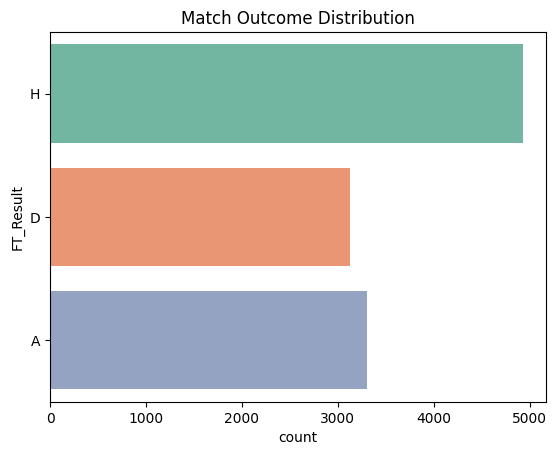

In [15]:
#Visualize Match Results
sns.countplot(df['FT_Result'], palette='Set2') # you can use df['FT_Result'] here
plt.title("Match Outcome Distribution")
plt.show()

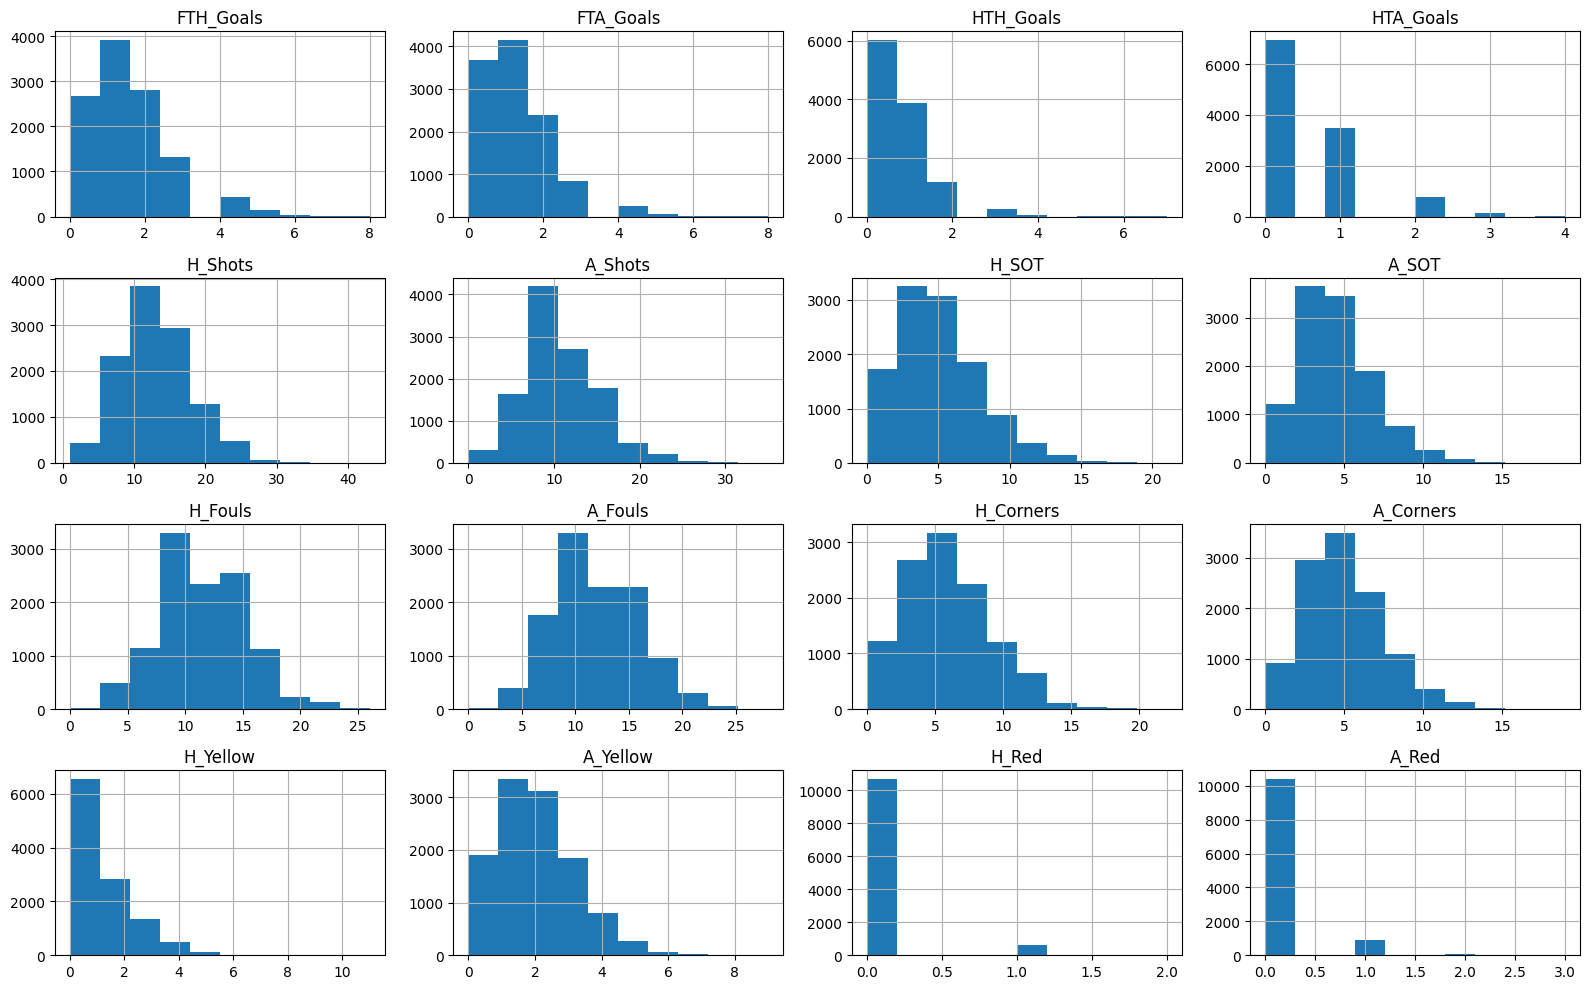

In [16]:
# Histograms for numerical columns
df.hist(figsize=(16, 10))
plt.tight_layout()
plt.show()

#  Feature Engineering

In [17]:
# Create new feature: Goal Difference
df['Goal_Difference'] = df['FTH_Goals'] - df['FTA_Goals']

In [18]:
df['HomeTeam'].unique()

array(['Blackburn', 'Cardiff', 'Plymouth', 'QPR', 'Sunderland', 'Stoke',
       'Swansea', 'Bristol City', 'Hull', 'Middlesbrough', 'Norwich',
       'Preston', 'Sheffield Weds', 'Watford', 'Millwall', 'Burnley',
       'Leeds', 'Luton', 'Portsmouth', 'West Brom', 'Sheffield United',
       'Coventry', 'Oxford', 'Derby', 'Birmingham', 'Ipswich',
       'Leicester', 'Rotherham', 'Huddersfield', 'Southampton', 'Wigan',
       'Reading', 'Blackpool', 'Bournemouth', 'Peterboro', 'Fulham',
       'Barnsley', "Nott'm Forest", 'Brentford', 'Wycombe', 'Charlton',
       'Aston Villa', 'Bolton', 'Burton', 'Wolves', 'Newcastle',
       'Brighton', 'Milton Keynes Dons', 'Yeovil', 'Doncaster',
       'Crystal Palace', 'West Ham', 'Scunthorpe', 'Colchester',
       'Southend', 'Crewe', 'Gillingham'], dtype=object)

In [19]:
df['AwayTeam'].unique()

array(['Portsmouth', 'Watford', 'Oxford', 'Luton', 'Burnley', 'Plymouth',
       'West Brom', 'Derby', 'Leeds', 'Cardiff', 'Coventry', 'Millwall',
       'Sheffield United', 'Bristol City', 'Stoke', 'Blackburn',
       'Norwich', 'Swansea', 'Preston', 'Middlesbrough', 'QPR',
       'Sheffield Weds', 'Hull', 'Sunderland', 'Huddersfield',
       'Southampton', 'Ipswich', 'Leicester', 'Rotherham', 'Birmingham',
       'Reading', 'Blackpool', 'Wigan', "Nott'm Forest", 'Fulham',
       'Barnsley', 'Bournemouth', 'Peterboro', 'Brentford', 'Wycombe',
       'Charlton', 'Bolton', 'Aston Villa', 'Burton', 'Wolves',
       'Brighton', 'Newcastle', 'Milton Keynes Dons', 'Doncaster',
       'Yeovil', 'Crystal Palace', 'West Ham', 'Scunthorpe', 'Colchester',
       'Southend', 'Crewe', 'Gillingham'], dtype=object)

##Encode Match Outcomes for Teams


In [20]:
# Define a function to map values based on FT_Result
def assign_team_values(result):
    if result == 'H':
        return 1, -1  # Home win
    elif result == 'A':
        return -1, 1  # Away win
    else:
        return 0, 0  # Draw

# Apply the function to create new columns
df[['HomeTeam_Num', 'AwayTeam_Num']] = df['FT_Result'].apply(lambda x: pd.Series(assign_team_values(x)))

# Check the transformed values
print(df[['HomeTeam', 'AwayTeam', 'FT_Result', 'HomeTeam_Num', 'AwayTeam_Num']].head())

#Converts match results into numeric values for both teams.

#Helps prepare data for modeling.


     HomeTeam    AwayTeam FT_Result  HomeTeam_Num  AwayTeam_Num
0   Blackburn  Portsmouth         H             1            -1
1     Cardiff     Watford         D             0             0
2    Plymouth      Oxford         D             0             0
3         QPR       Luton         H             1            -1
4  Sunderland  Portsmouth         H             1            -1


In [21]:
#Removes text-based team names after converting to numeric

df.drop(columns=['HomeTeam', 'AwayTeam'], inplace=True)

##Encode Result Columns

In [22]:
# Define the mapping for FT_Result and HT_Result
ft_result_mapping = {
    'H': 1,  # Home Win
    'D': 0,  # Draw
    'A': -1   # Away Win
}

# Apply mapping to the FT_Result column
df['FT_Result'] = df['FT_Result'].map(ft_result_mapping)
# Check the transformed values
print(df[['FT_Result']].head())



   FT_Result
0          1
1          0
2          0
3          1
4          1


In [23]:
ht_result_mapping = {
    'H': 1,  # Home Win
    'D': 0,  # Draw
    'A': -1   # Away Win
}
df['HT_Result'] = df['HT_Result'].map(ht_result_mapping)
print(df[['HT_Result']].head())

   HT_Result
0        0.0
1        0.0
2       -1.0
3        0.0
4        1.0


Maps final and half-time result to numeric format for classification.

##Encode Referee Column

In [24]:
#Label encodes referee names to numeric.

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()


df['Referee'] = le.fit_transform(df['Referee'])
# df['HomeTeam'] = le.fit_transform(df['HomeTeam'])
# df['AwayTeam'] = le.fit_transform(df['AwayTeam'])

In [25]:
df

,FTH_Goals,FTA_Goals,FT_Result,HTH_Goals,HTA_Goals,HT_Result,Referee,H_Shots,A_Shots,H_SOT,...,A_Fouls,H_Corners,A_Corners,H_Yellow,A_Yellow,H_Red,A_Red,Goal_Difference,HomeTeam_Num,AwayTeam_Num
0,3,0,1,0.0,0.0,0.0,58,13.0,11.0,6.0,...,19.0,5.0,6.0,1.0,3.0,0.0,0.0,3,1,-1
1,1,1,0,0.0,0.0,0.0,135,12.0,4.0,4.0,...,14.0,7.0,3.0,1.0,2.0,0.0,0.0,0,0,0
2,1,1,0,0.0,1.0,-1.0,168,11.0,8.0,2.0,...,10.0,6.0,3.0,1.0,1.0,0.0,0.0,0,0,0
3,2,1,1,1.0,1.0,0.0,5,15.0,18.0,6.0,...,9.0,3.0,4.0,1.0,1.0,0.0,0.0,1,1,-1
4,1,0,1,1.0,0.0,1.0,187,24.0,6.0,8.0,...,10.0,7.0,3.0,1.0,2.0,0.0,1.0,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11346,0,0,0,0.0,0.0,0.0,73,6.0,12.0,2.0,...,16.0,2.0,5.0,2.0,2.0,0.0,0.0,0,0,0
11347,2,1,1,1.0,0.0,1.0,125,15.0,11.0,9.0,...,9.0,6.0,4.0,1.0,0.0,0.0,0.0,1,1,-1
11348,1,1,0,1.0,1.0,0.0,136,10.0,9.0,4.0,...,14.0,5.0,6.0,0.0,1.0,0.0,0.0,0,0,0
11349,3,2,1,2.0,1.0,1.0,138,8.0,7.0,5.0,...,8.0,7.0,1.0,1.0,2.0,0.0,0.0,1,1,-1


#Correlation Matrix

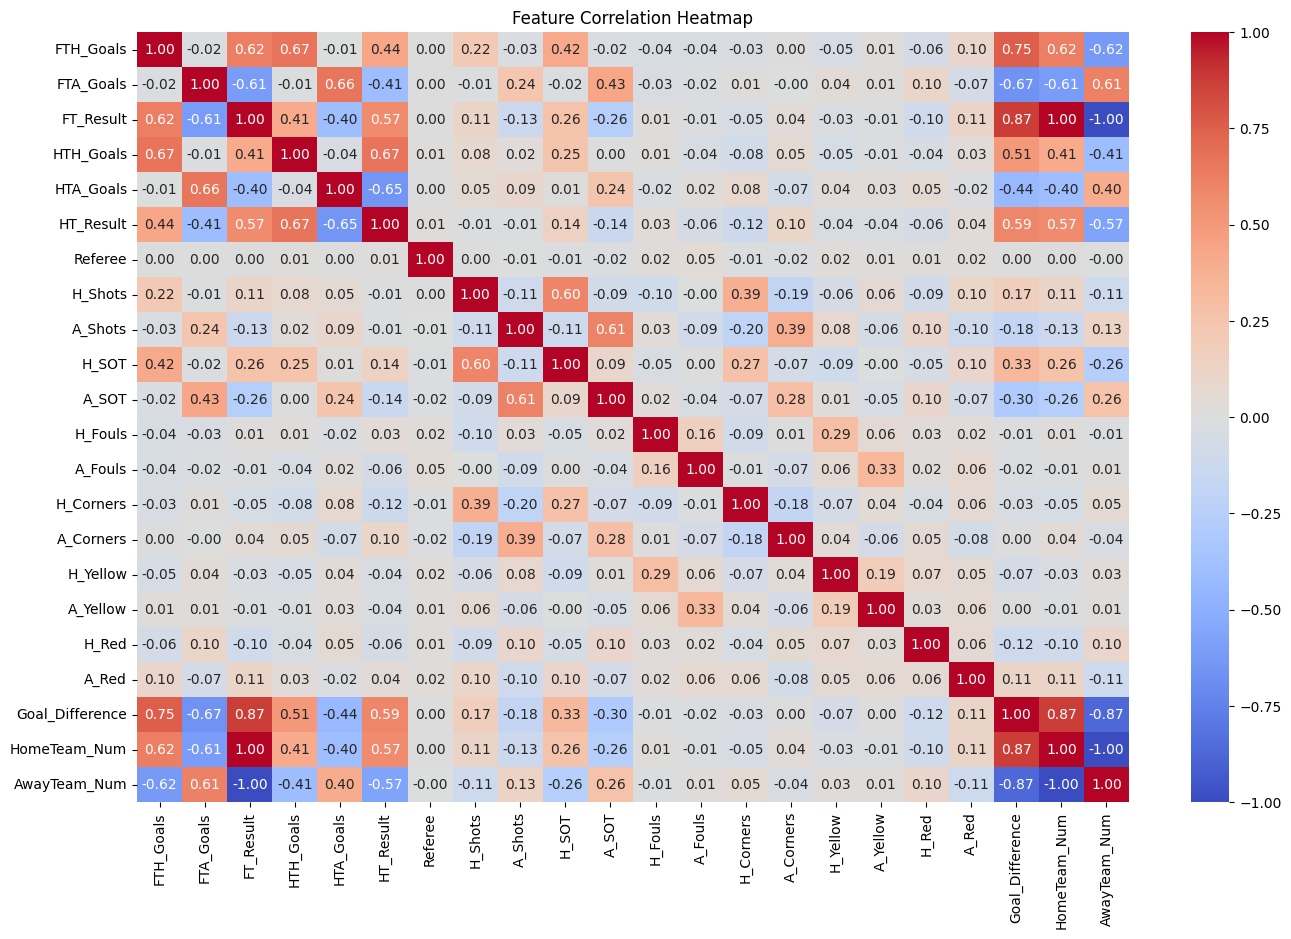

In [26]:
#Visualizes correlation between features.
plt.figure(figsize=(16, 10))

corr_matrix =df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

we can remove

* H_Shots
* A_Shots
* H_Fouls
* A_Fouls
* H_Corners
* A_Corners
* H_Yellow
* A_Yellow
* H_Red
* A_Red
* A_SOT
* H_SOT
* HT_Reasult

 Feature Drop Before Modeling


In [27]:
X = df.drop(columns=['H_Shots','A_Shots','H_Fouls','A_Fouls','H_Corners','A_Corners','H_Yellow','A_Yellow','H_Red','A_Red','Referee','HT_Result'],inplace= True)


In [28]:
df

,FTH_Goals,FTA_Goals,FT_Result,HTH_Goals,HTA_Goals,H_SOT,A_SOT,Goal_Difference,HomeTeam_Num,AwayTeam_Num
0,3,0,1,0.0,0.0,6.0,2.0,3,1,-1
1,1,1,0,0.0,0.0,4.0,2.0,0,0,0
2,1,1,0,0.0,1.0,2.0,3.0,0,0,0
3,2,1,1,1.0,1.0,6.0,4.0,1,1,-1
4,1,0,1,1.0,0.0,8.0,1.0,1,1,-1
...,...,...,...,...,...,...,...,...,...,...
11346,0,0,0,0.0,0.0,2.0,4.0,0,0,0
11347,2,1,1,1.0,0.0,9.0,5.0,1,1,-1
11348,1,1,0,1.0,1.0,4.0,4.0,0,0,0
11349,3,2,1,2.0,1.0,5.0,6.0,1,1,-1


In [29]:
df.skew()

,0
FTH_Goals,0.881362
FTA_Goals,0.965185
FT_Result,-0.274707
HTH_Goals,1.286134
HTA_Goals,1.407397
H_SOT,0.768375
A_SOT,0.857098
Goal_Difference,0.112538
HomeTeam_Num,-0.274707
AwayTeam_Num,0.274707


##Boxplots to Detect Outliers

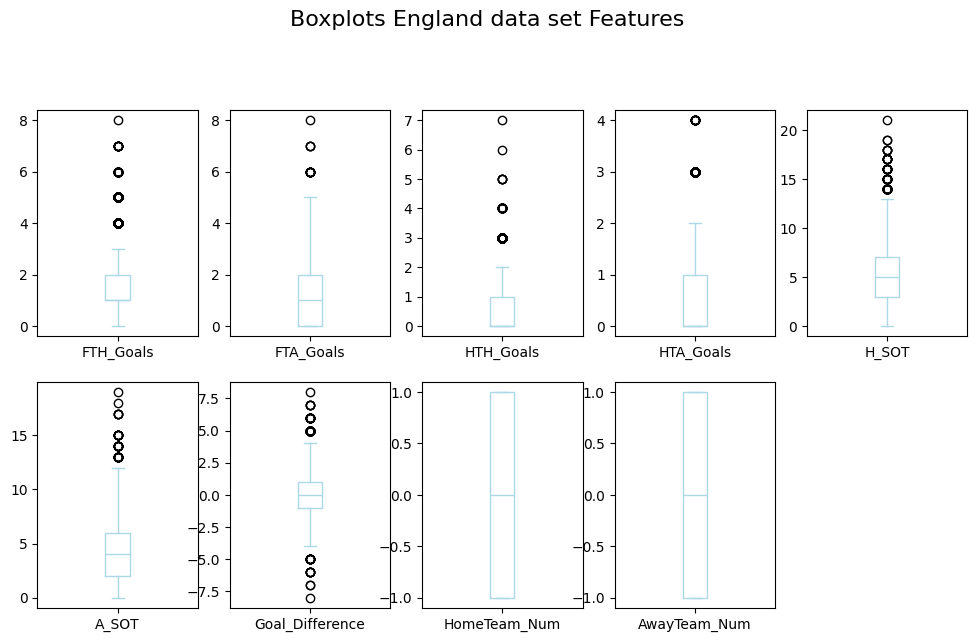

In [30]:
#Plotting boxplots for each
df2=df.drop(columns='FT_Result',axis=1)
df2.plot(kind='box', subplots=True, layout=(3,5), figsize=(12,10),
color='lightblue')
plt.suptitle('Boxplots England data set Features', fontsize=16)
plt.show()

In [31]:
# import numpy as np
# df['FTH_Goals'] = np.log1p(df['FTH_Goals'])
# df['FTA_Goals'] = np.log1p(df['FTA_Goals'])
# df['HTH_Goals'] = np.log1p(df['HTH_Goals'])
# df['HTA_Goals'] = np.log1p(df['HTA_Goals'])
# df['A_SOT'] = np.log1p(df['A_SOT'])
# df['H_SOT'] = np.log1p(df['H_SOT'])
# df['Goal_Difference'] = np.log1p(df['Goal_Difference'])



In [32]:
df.skew()

,0
FTH_Goals,0.881362
FTA_Goals,0.965185
FT_Result,-0.274707
HTH_Goals,1.286134
HTA_Goals,1.407397
H_SOT,0.768375
A_SOT,0.857098
Goal_Difference,0.112538
HomeTeam_Num,-0.274707
AwayTeam_Num,0.274707


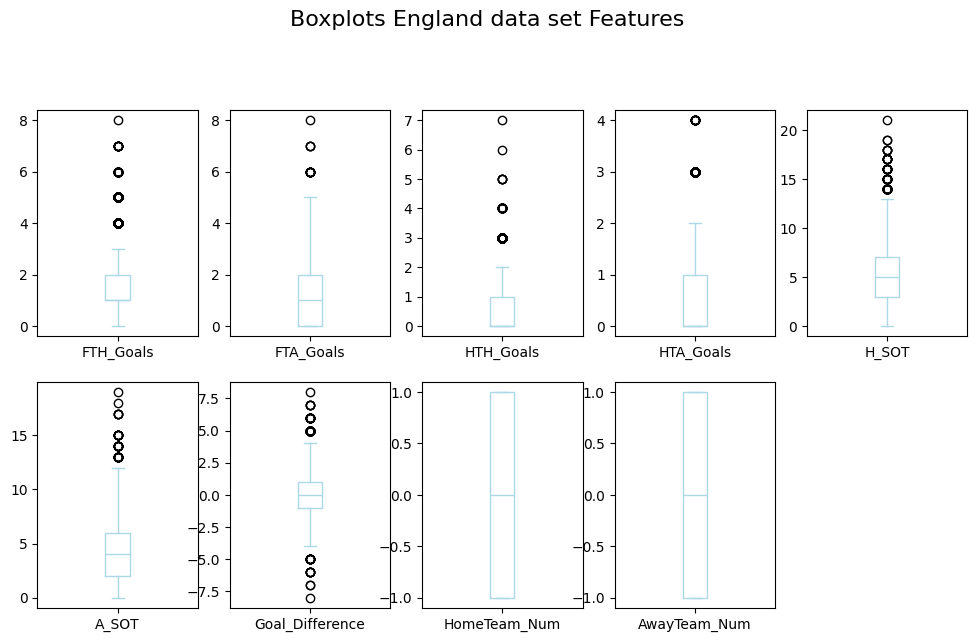

In [33]:
df3=df.drop(columns='FT_Result',axis=1)
df3.plot(kind='box', subplots=True, layout=(3,5), figsize=(12,10),
color='lightblue')
plt.suptitle('Boxplots England data set Features', fontsize=16)
plt.show()

In [34]:
#removes outliers from the dataset
numerical_cols = ['FTH_Goals','FTA_Goals','HTH_Goals','HTA_Goals','Goal_Difference','A_SOT','H_SOT']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [35]:
df.shape

(10325, 10)

In [36]:
df.skew()

,0
FTH_Goals,0.288161
FTA_Goals,0.774982
FT_Result,-0.191167
HTH_Goals,0.862866
HTA_Goals,1.059292
H_SOT,0.583527
A_SOT,0.662616
Goal_Difference,-0.182829
HomeTeam_Num,-0.191167
AwayTeam_Num,0.191167


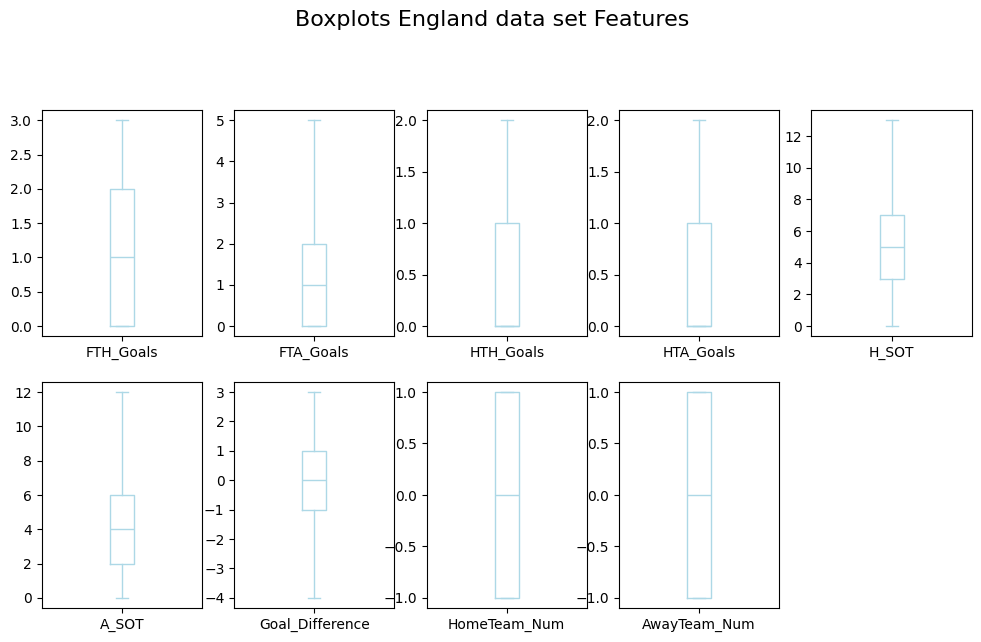

In [37]:
df3=df.drop(columns='FT_Result',axis=1)
df3.plot(kind='box', subplots=True, layout=(3,5), figsize=(12,10),
color='lightblue')
plt.suptitle('Boxplots England data set Features', fontsize=16)
plt.show()

In [38]:
df

,FTH_Goals,FTA_Goals,FT_Result,HTH_Goals,HTA_Goals,H_SOT,A_SOT,Goal_Difference,HomeTeam_Num,AwayTeam_Num
0,3,0,1,0.0,0.0,6.0,2.0,3,1,-1
1,1,1,0,0.0,0.0,4.0,2.0,0,0,0
2,1,1,0,0.0,1.0,2.0,3.0,0,0,0
3,2,1,1,1.0,1.0,6.0,4.0,1,1,-1
4,1,0,1,1.0,0.0,8.0,1.0,1,1,-1
...,...,...,...,...,...,...,...,...,...,...
11345,0,0,0,0.0,0.0,3.0,3.0,0,0,0
11346,0,0,0,0.0,0.0,2.0,4.0,0,0,0
11347,2,1,1,1.0,0.0,9.0,5.0,1,1,-1
11348,1,1,0,1.0,1.0,4.0,4.0,0,0,0


In [39]:
# from sklearn.preprocessing import StandardScaler
# #Standardization (mean = 0, std = 1)
# scaler = StandardScaler()

# # Make sure these columns exist before trying to scale
# # Replace with the actual column names if they are different
# df_scaled = scaler.fit_transform(df.drop(columns=["FT_Result"]))

In [40]:
# df_scaled

In [41]:
# from sklearn.preprocessing import MinMaxScaler

# # MinMaxScaling
# minmax_scaler = MinMaxScaler()

# df_minmax_scaled = minmax_scaler.fit_transform(df.drop(columns=["FT_Result"]))

In [42]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Check class distribution before balancing
# print("Before Balancing:", Counter(y_train))

# # Apply SMOTE to balance data
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# # Check class distribution after balancing
# print("After Balancing:", Counter(y_train_balanced))


In [43]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Train Random Forest Model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train_balanced, y_train_balanced)

# # Predict on Test Data
# y_pred_rf = rf_model.predict(X_test)

# # Evaluate the Model
# print("\n🔹 Random Forest Results 🔹")
# print("Accuracy:", accuracy_score(y_test, y_pred_rf))
# print(classification_report(y_test, y_pred_rf))


In [44]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming 'df' is your DataFrame and 'FT_Result' is your target column
# X = df.drop(columns=['FT_Result'])
# y = df['FT_Result']

# # Before splitting you may want to do feature scaling, if your features have different ranges.

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # This part should be after the train test split

# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Check class distribution before balancing
# print("Before Balancing:", Counter(y_train))

# # Apply SMOTE to balance data, if required
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# # Check class distribution after balancing
# print("After Balancing:", Counter(y_train_balanced))

# # Ensure y_train_balanced contains only 0, 1, and 2
# y_train_balanced = y_train_balanced.map({0: 0, 1: 1, 2: 2})
# y_test = y_test.map({0: 0, 1: 1, 2: 2}) # Make the same changes to y_test for consistency


# # Modify the XGBoost model initialization to handle multi-class classification:
# xgb_model = XGBClassifier(
#     n_estimators=100,
#     random_state=42,
#     use_label_encoder=False,
#     eval_metric='mlogloss',  # Use 'mlogloss' for multi-class
#     objective='multi:softmax',  # Set objective for multi-class
#     num_class=3 # Since you have 3 classes. If you used LabelBinarizer this could change
# )

# # Fit and predict as before
# xgb_model.fit(X_train_balanced, y_train_balanced)
# y_pred_xgb = xgb_model.predict(X_test)

# # Evaluate the Model
# print("\n🔹 XGBoost Results 🔹")
# print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
# print(classification_report(y_test, y_pred_xgb))


# Data Balancing

<ipython-input-45-842e5de0f7bf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['FT_Result'], palette="Set2")


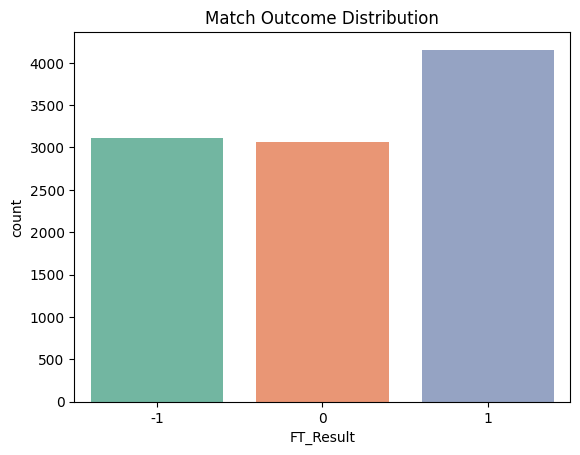

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['FT_Result'], palette="Set2")
plt.title("Match Outcome Distribution")
plt.show()

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df[['A_SOT','H_SOT', 'Goal_Difference','HomeTeam_Num', 'AwayTeam_Num']]
y = df['FT_Result']

# Split dataset before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


#Selects important features and target for prediction.

#Splits data into training and testing sets.

#Uses SMOTE to balance the training dataset (important due to class imbalance).

# Model Training (Random Forest & XGBoost)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    criterion="entropy",
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features="sqrt",
    )


rf_model.fit(X_train_bal, y_train_bal)

#Trains a Random Forest Classifier with specified hyperparameters.

#entropy measures information gain, helping choose better splits.

#Balanced training data ensures better model performance


# Predictions
y_pred_rf = rf_model.predict(X_test)


# Model evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

#Predicts match outcome for test set.

#Evaluates model using accuracy and classification metrics (precision, recall, F1-score).

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       622
           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00       831

    accuracy                           1.00      2065
   macro avg       1.00      1.00      1.00      2065
weighted avg       1.00      1.00      1.00      2065



In [48]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_bal, y_train_bal)

# Print best parameters
print("Best Parameters for Random Forest:", grid_search.best_params_)
#Performs hyperparameter tuning using GridSearchCV to find the best set of parameters for the Random Forest model.

#Uses 3-fold cross-validation for model robustness.

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


#**Final Report**

In this football match outcome prediction project, we explored and analyzed match data using various data science techniques. We began with exploratory data analysis (EDA) to understand the structure, distribution, and quality of the data. Key preprocessing steps included handling missing values, encoding categorical features, removing outliers, and transforming the target labels for modeling.

We engineered useful features such as shot statistics, goal differences, and team encodings. To address class imbalance in the target variable (FT_Result), we applied the SMOTE technique, which helped improve model learning.

For prediction, we implemented and evaluated a Random Forest Classifier. The model achieved a good level of accuracy, and we further optimized it using Grid Search to find the best hyperparameters.

Overall, the project demonstrated the power of machine learning models in predicting match outcomes based on historical match statistics. These insights can be valuable for analysts, coaches, or betting strategies.